In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')
#Sklearn for Model Building
#Sklearn for Model Building
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('train_data.csv')

## UNDERSTANDING DATA

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

## DATA QUALITY CHECK & CORRECTION

In [5]:
# Checking missing values in each column
round(100*(df.isnull().sum()/len(df)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [6]:
# Removing columns with more than 40% null values
# Here thresh is for non-null values 
df = df.dropna(thresh= (0.6*len(df)),axis = 1)

In [7]:
df.shape

(1460, 76)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [9]:
df.GarageQual.unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [10]:
df.GarageCond.unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [11]:
# After understanding columns Garagecond and GarageQual from Data dictionary NAN means No garage
# Replacing NAN values with string NA-Not Applicable as the missing number of values are same 
df[['GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = df[['GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].fillna('NA')

In [12]:
df.GarageYrBlt = df.GarageYrBlt.fillna(0.0)

In [13]:
# Missing values in Numercial Columns replaced by Median
# Missing Values in Categorical Columns should be replaced by Mode
Num_col=['LotFrontage','MasVnrArea']
Cat_col=['MasVnrType','Electrical']

In [14]:
for i in Num_col:
    med=df[i].median()
    df[i]=df[i].fillna(med)

In [15]:
for i in Cat_col:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [17]:
duplicate_cols = df.columns[df.columns.duplicated()] #Checked for similar columns by name
duplicate_cols = ['Condition2','OverallCond','Exterior2nd','ExterCond','BsmtCond','BsmtFinType2','BsmtFinSF2','GarageCond']
# Duplicate Columns By analysing similar type of Columns

In [18]:
df.drop(duplicate_cols, inplace=True, axis=1)
df.drop(['MiscVal','Id'],inplace=True, axis=1) #Dropping Columns with most zeros and all unique value

In [19]:
df[['YrSold']] = df [['YrSold']].apply(lambda x:x.map({2006:'2006',2007:'2007',2008:'2008',2009:'2009',2010:'2010'}))
df[['MoSold']] = df[['MoSold']].apply(lambda x:x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}))

## EDA

In [20]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns

In [21]:
# Univariate Analysis
# for i in numerical_columns:
#     sns.histplot(x=df[i])
#     plt.show()

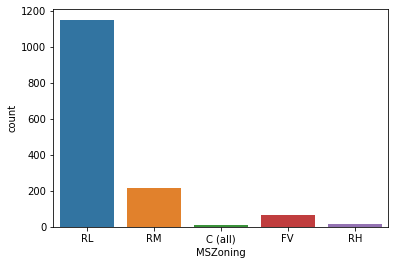

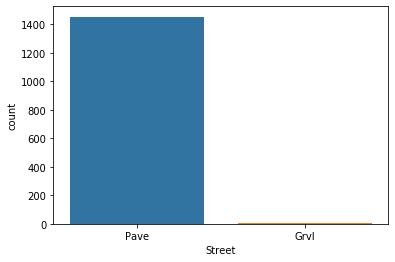

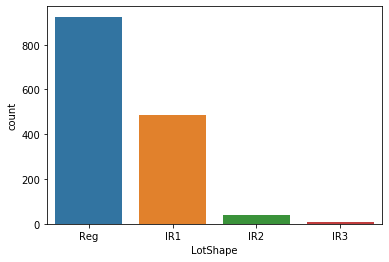

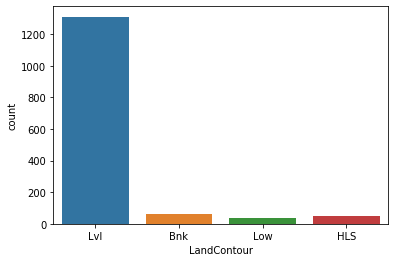

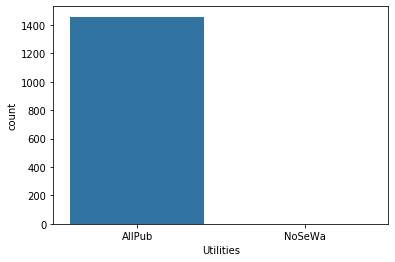

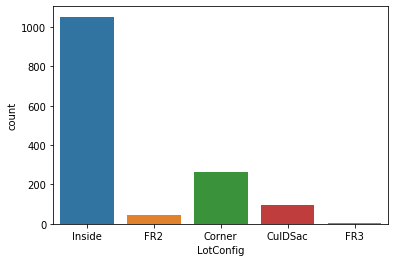

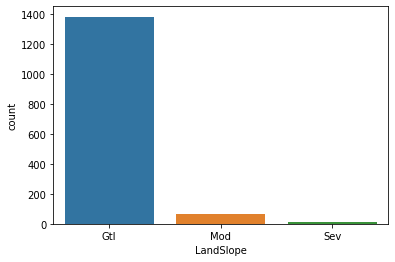

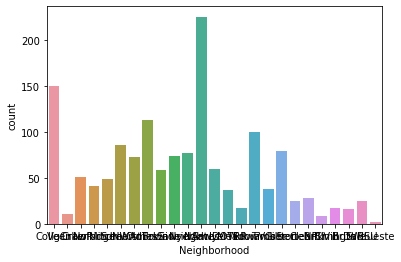

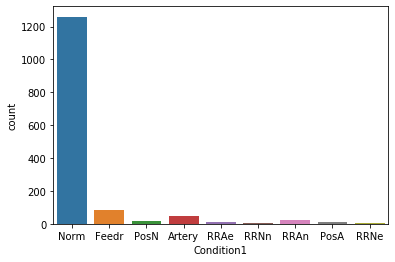

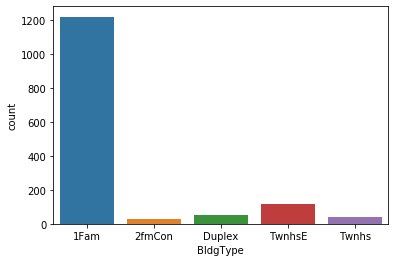

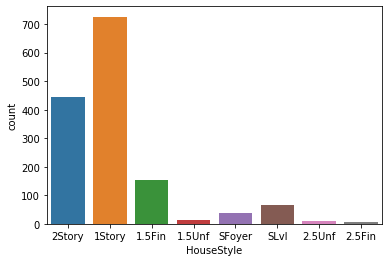

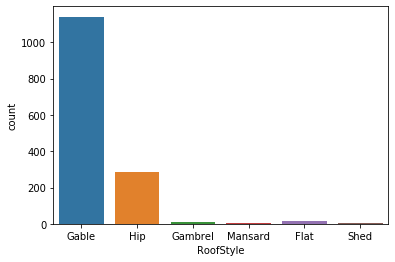

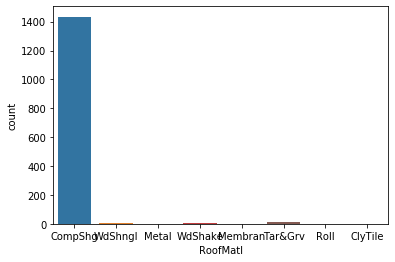

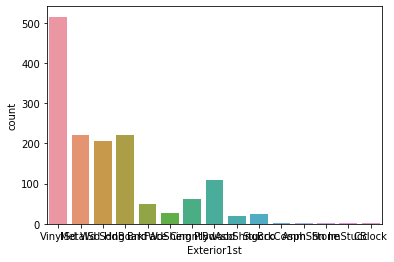

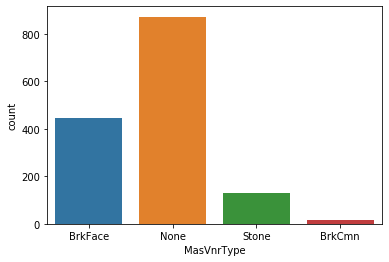

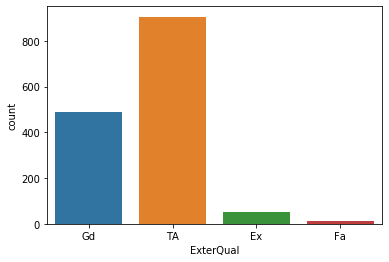

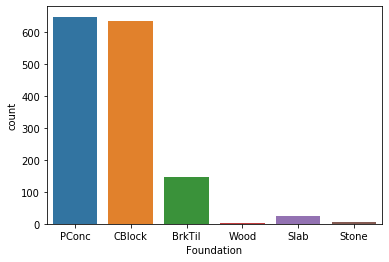

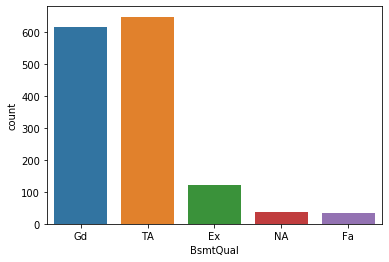

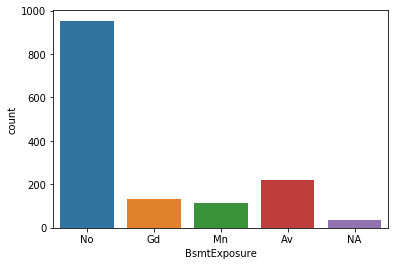

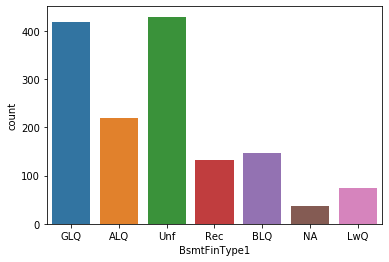

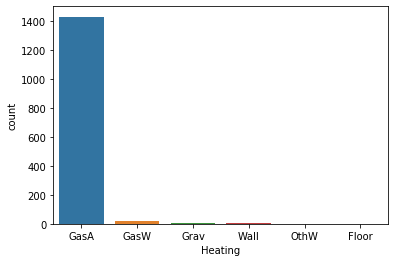

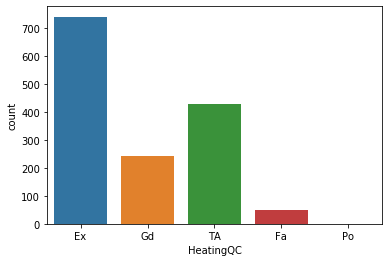

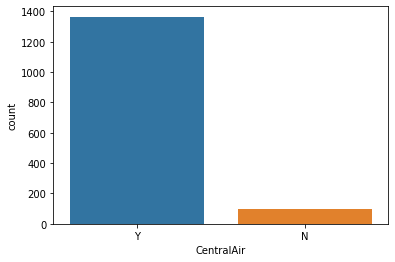

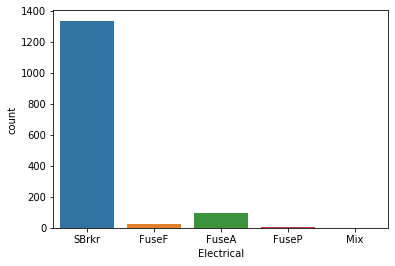

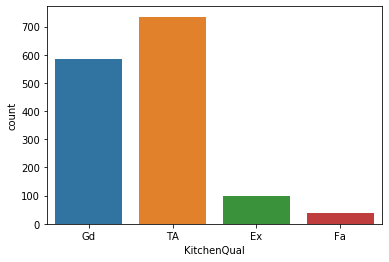

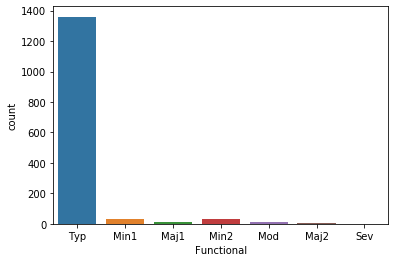

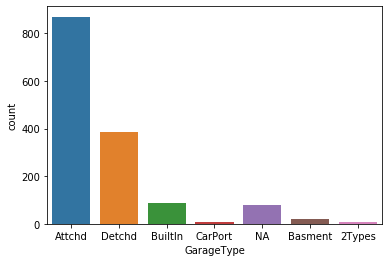

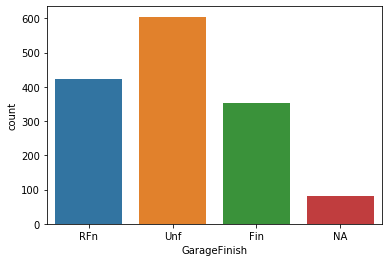

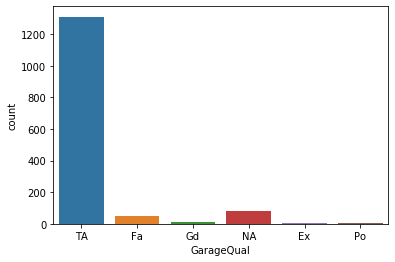

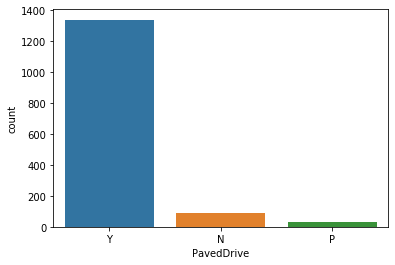

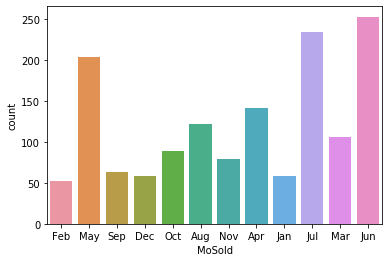

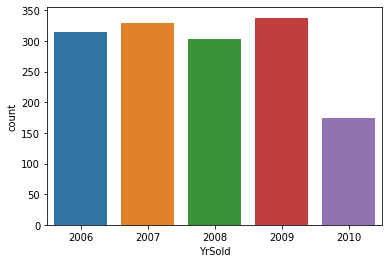

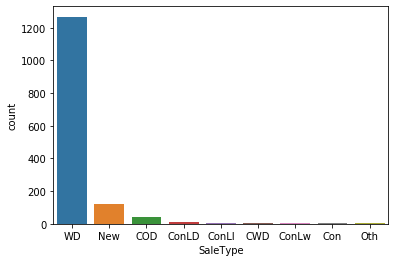

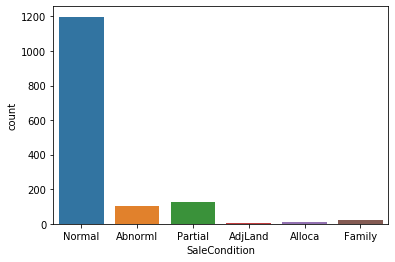

In [22]:
for i in categorical_columns:
    sns.countplot(x=df[i])
    plt.show()

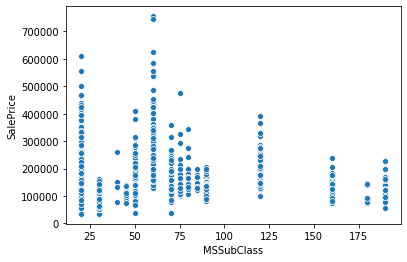

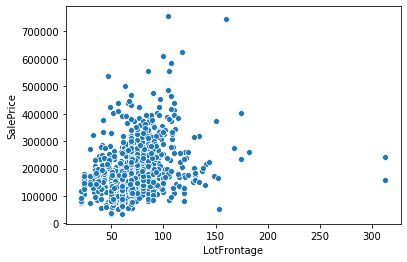

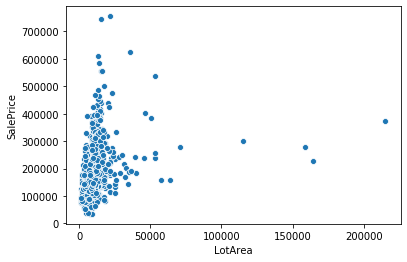

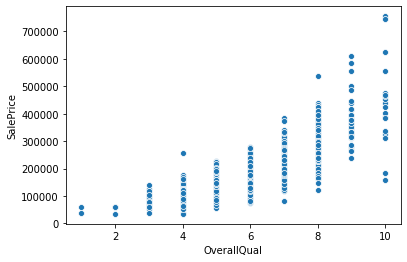

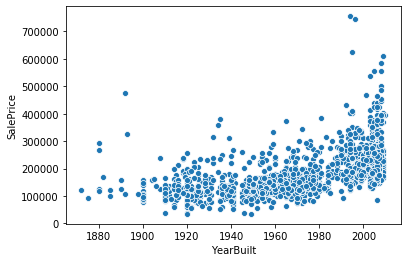

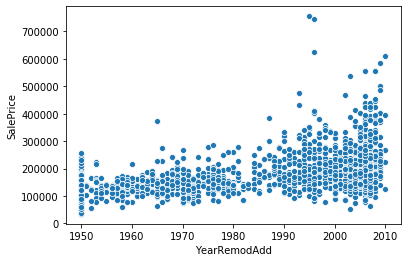

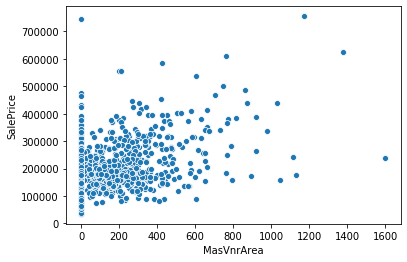

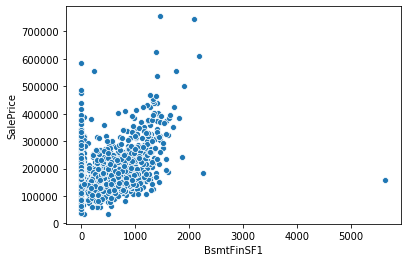

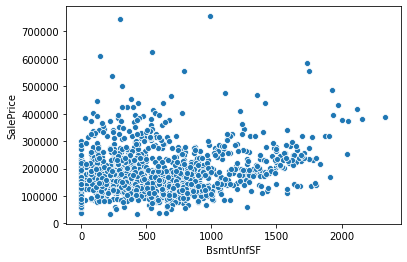

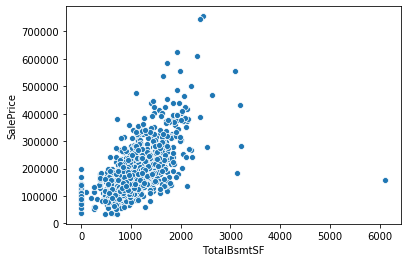

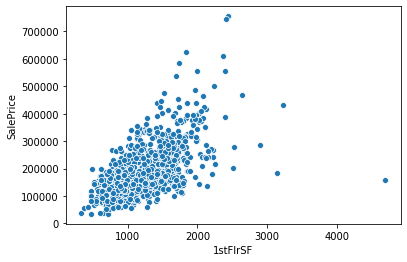

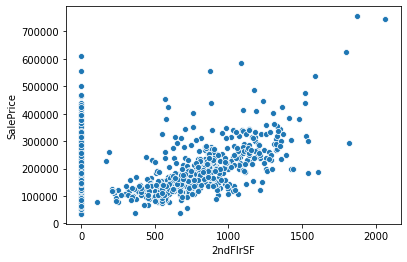

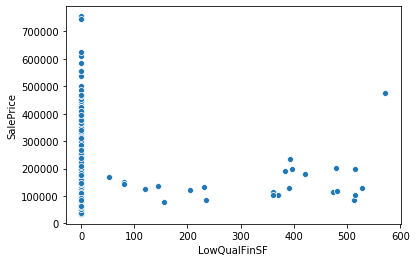

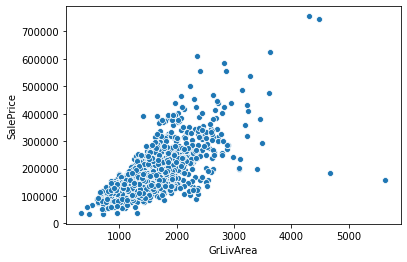

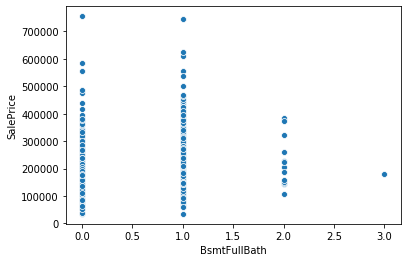

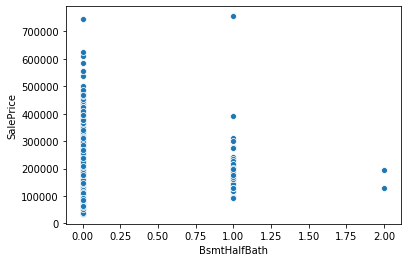

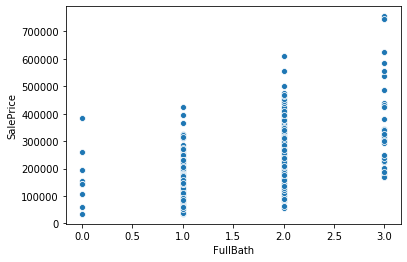

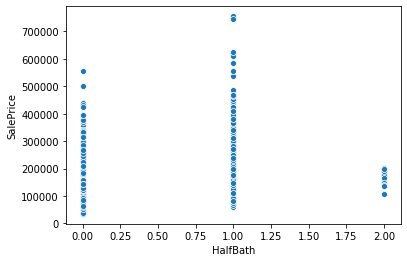

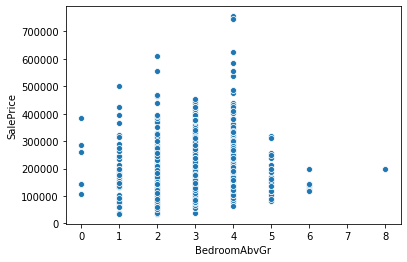

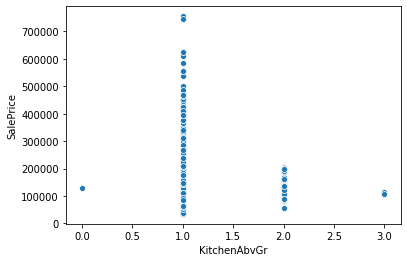

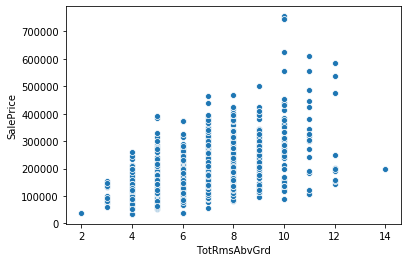

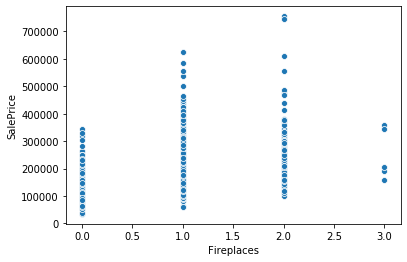

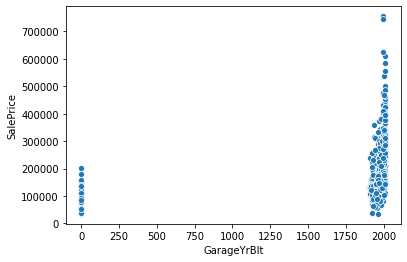

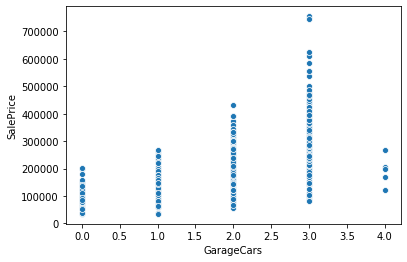

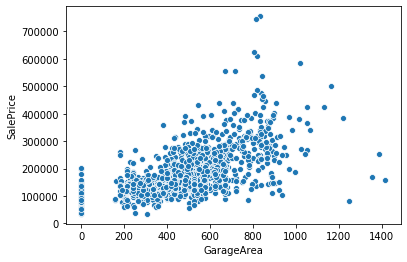

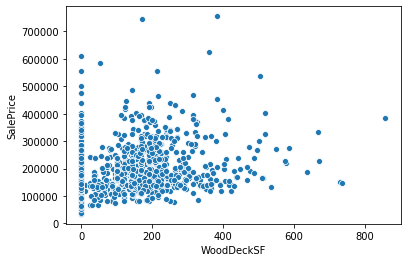

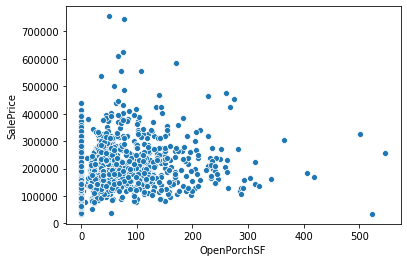

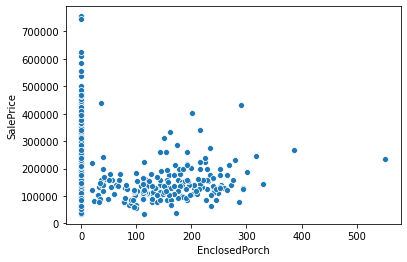

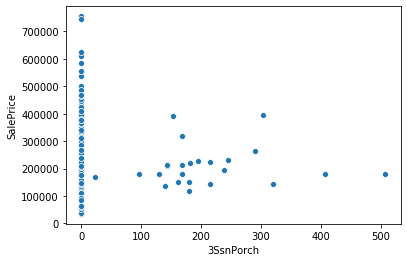

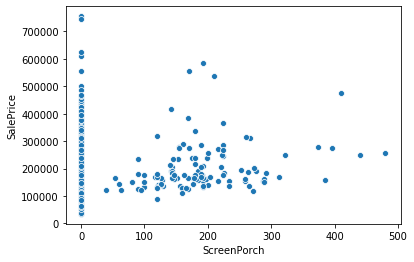

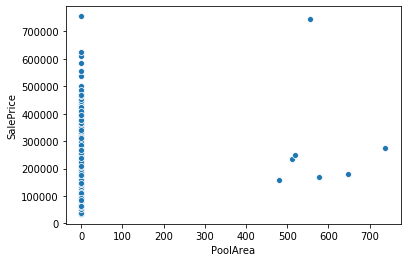

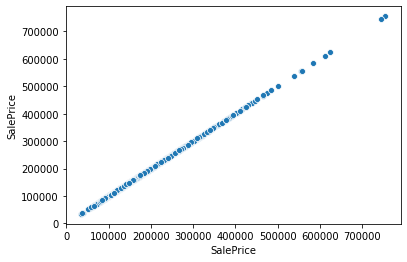

In [23]:
# Bivariate Analysis
for i in numerical_columns:
    sns.scatterplot(x=df[i],y=df['SalePrice'])
    plt.show()

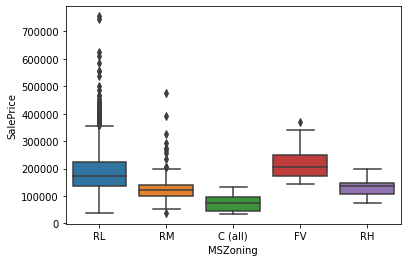

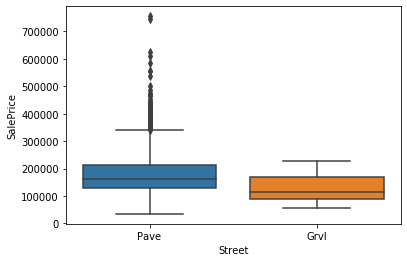

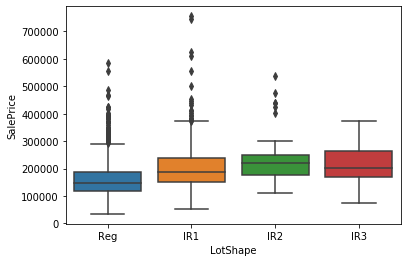

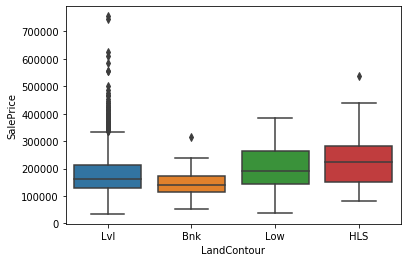

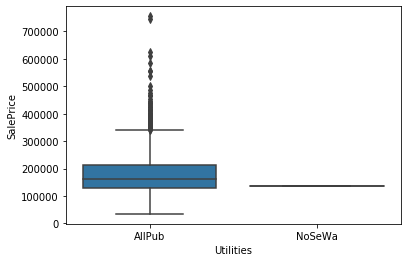

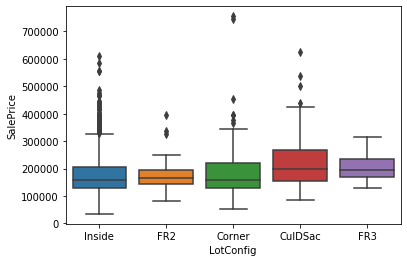

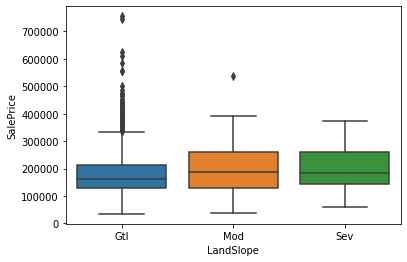

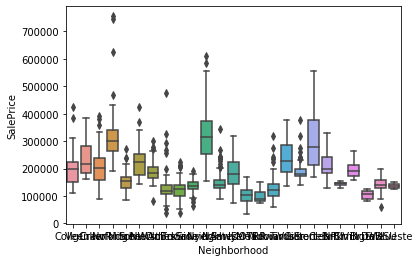

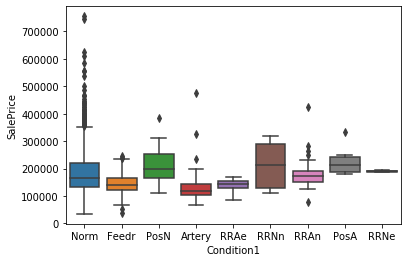

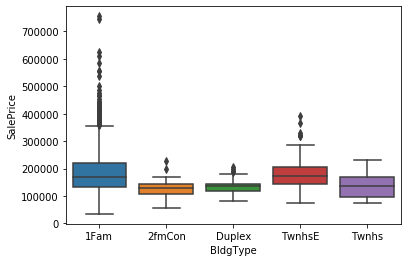

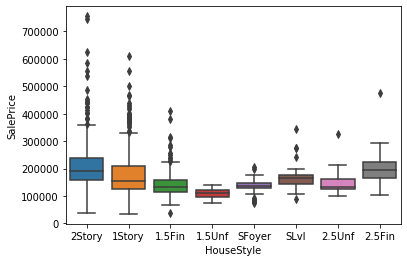

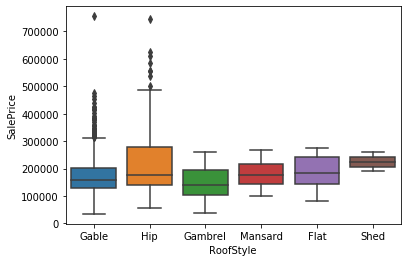

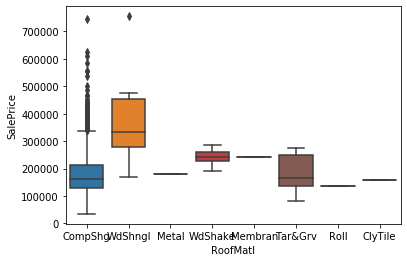

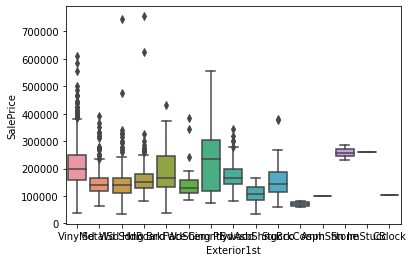

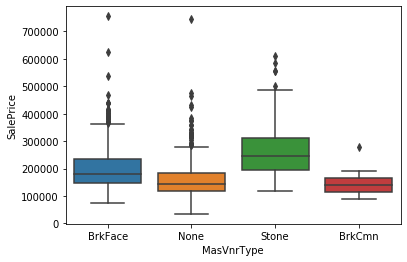

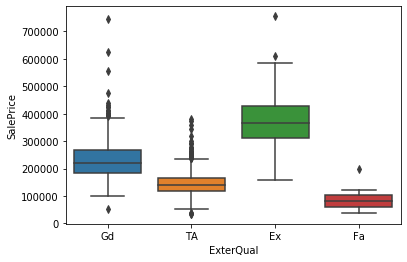

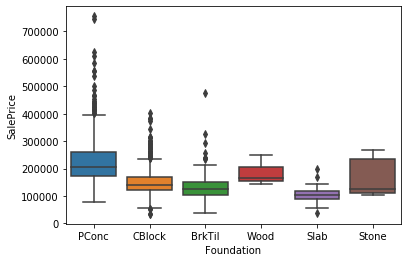

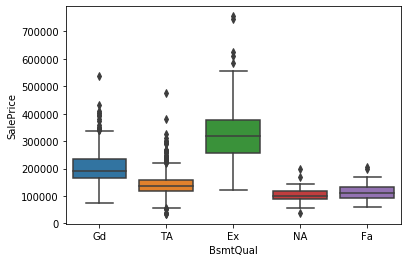

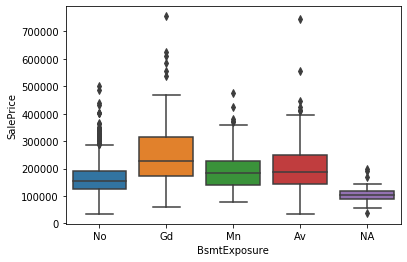

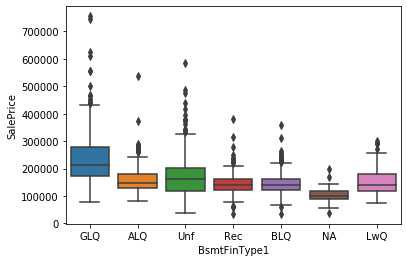

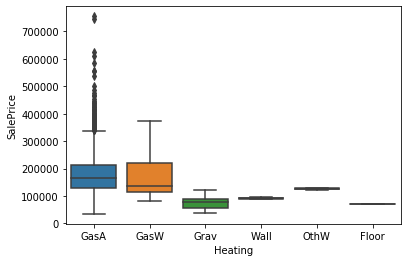

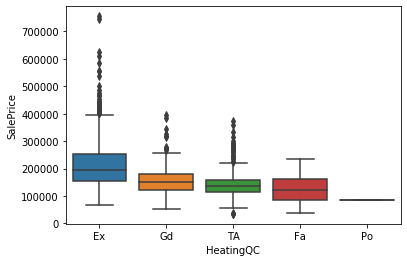

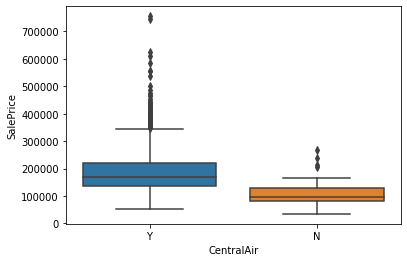

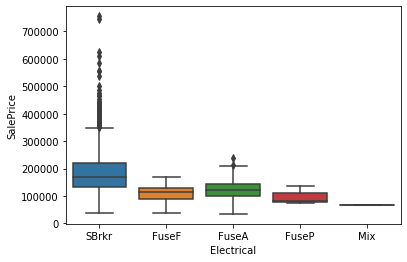

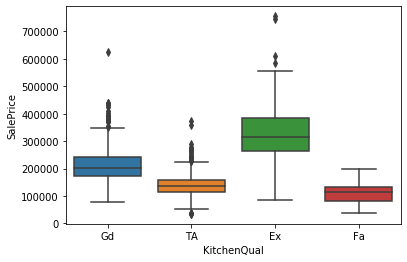

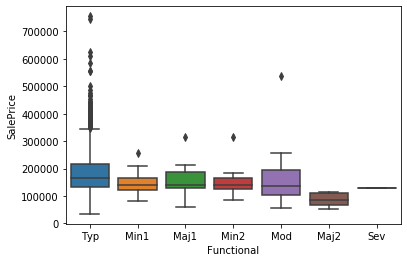

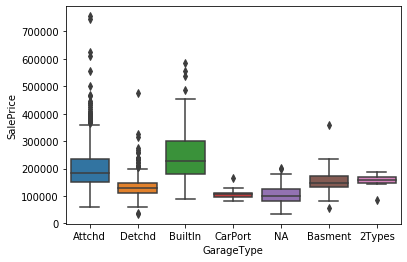

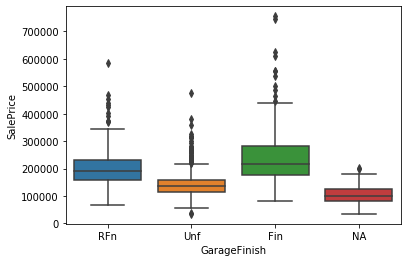

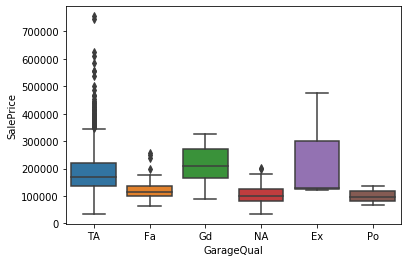

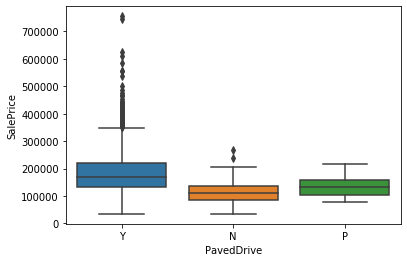

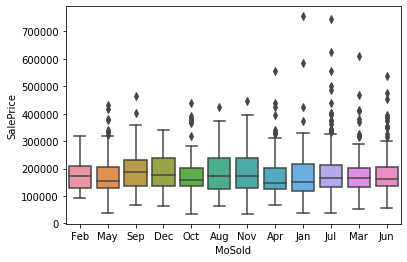

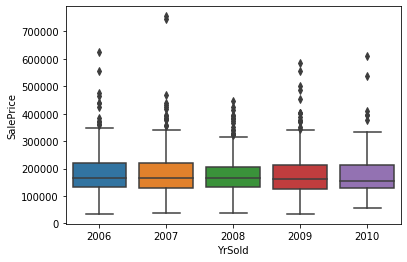

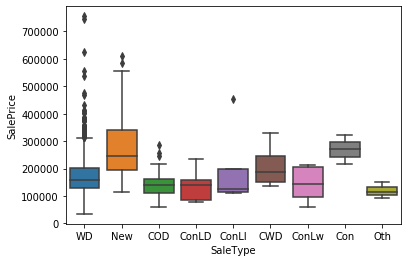

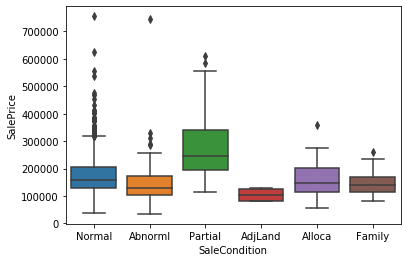

In [24]:
for i in categorical_columns:
    sns.boxplot(x=df[i],y=df['SalePrice'])
    plt.show()

In [25]:
# After EDA Removing below columns
df.drop(['Street','LandContour', 'Utilities','LandSlope','Condition1','RoofMatl','Heating','CentralAir','Functional','PavedDrive'],inplace=True,axis=1)
df.drop(['LowQualFinSF','3SsnPorch','PoolArea','YearBuilt','YearRemodAdd'],inplace=True,axis=1)

## Creating Dummies

In [26]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns

In [27]:
categorical_columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'Electrical', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [28]:
len(categorical_columns)

24

In [29]:
df[categorical_columns].nunique().sum()

167

In [30]:
df_dumm = pd.get_dummies(df[categorical_columns],drop_first=True,dtype=int)

In [31]:
df_dumm.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=143)

In [32]:
df.drop(categorical_columns,inplace=True,axis=1)

In [33]:
df1 = pd.concat([df,df_dumm],axis=1)

In [34]:
df1.shape

(1460, 170)

## Splitting Data and Rescaling Variables

In [35]:
y=df1[['SalePrice']]
X=df1.drop(['SalePrice'],axis=1)

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [37]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 1436 to 266
Columns: 169 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int32(143), int64(23)
memory usage: 337.1 KB


## Scaling

In [38]:
#Instantiate MinMaxscaling object
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_traindf = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = scaler.fit_transform(X_test)
X_testdf = pd.DataFrame(X_test_scaled,columns=X_test.columns)

y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.fit_transform(y_test)

In [39]:
#Feature selection using RFE

estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=70)

selector=selector.fit(X_train,y_train)
selector.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False,  True, False,  True,  True, False,  True,  True,
        True, False,  True, False, False, False, False, False,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False, False, False,  True,  True,  True,  True, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True, False, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False,  True, False, False,
        True,  True,  True, False,  True, False, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
        True, False,

In [40]:
selected_features=X_train.columns[selector.support_]

In [41]:
selected_features

Index(['OverallQual', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Gilbert', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'RoofStyle_Gambrel',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior1st_WdShing',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'ExterQual_Fa',

In [42]:
X_train_scaled = X_traindf[selected_features]
X_test_scaled = X_testdf[selected_features]
X_train_scaled.head()

,OverallQual,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MSZoning_FV,MSZoning_RH,...,GarageType_NA,GarageFinish_NA,GarageQual_Gd,GarageQual_NA,GarageQual_TA,MoSold_Jul,SaleType_ConLD,SaleType_ConLw,SaleType_New,SaleCondition_Partial
0,0.444444,0.333333,0.333333,0.0,0.0,0.181818,0.000000,0.00,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.666667,0.333333,0.666667,0.5,0.0,0.545455,0.333333,0.75,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.555556,0.000000,0.333333,0.5,0.0,0.363636,0.333333,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.555556,0.000000,0.333333,0.0,0.0,0.181818,0.000000,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.000000,0.666667,0.0,0.5,0.727273,0.000000,0.50,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Building Model 

In [43]:
# Instantiate 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
lm = LinearRegression()

lm.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
print(lm.coef_)
print(lm.intercept_)

[[ 1.22313625e+05  3.65694958e+04  6.38541651e+04  2.18985770e+04
  -3.58882533e+04  8.05852799e+04  1.91020844e+04  5.11707967e+04
   1.73877615e+04  3.22269473e+04  2.31032626e+04  2.35307571e+04
  -1.57330796e+04  1.00898516e+04 -1.69987476e+04 -1.83561263e+04
   8.87648354e+03  1.97624997e+04  1.30394576e+04  3.61835428e+04
   9.20836727e+03  8.86958716e+04  4.07817999e+04  1.07613191e+04
   3.55815239e+04  4.03458449e+04  2.75250844e+04 -1.05236137e+04
  -1.98742364e+04 -2.51485635e+04 -1.86262597e+04  1.23276303e+04
   7.90721596e+03  1.07356678e+04  1.68140432e+04  3.37334477e+04
  -6.16478035e+03 -2.31717899e+04  1.84324999e+04  3.85310116e+04
  -4.47579978e+04 -1.27222994e+04 -1.13681617e+04  8.81367258e+03
   7.99059828e+03 -1.25156368e+04  9.72544094e+03  3.04086509e+04
   4.69709315e+04 -4.30362533e+04 -4.05072532e+04  1.13812042e+17
  -3.97949238e+04  2.50375184e+04 -9.55280131e+03 -1.13812042e+17
  -3.03827992e+04 -4.15818220e+04 -3.42703803e+04 -4.28783367e+04
   3.03319

In [45]:
from sklearn.metrics import r2_score, mean_squared_error

In [46]:
y_pred_train = lm.predict(X_train_scaled)
y_pred_test = lm.predict(X_test_scaled)

metric = []
r2_train_lr = r2_score(y_train,y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test,y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train.values-y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test.values-y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test,y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8588049903505073
-1.5100991329660086e+20
902048911251.6924
4.256535348162442e+32
882631028.6220082
9.718117233247584e+29


## Ridge

In [47]:
#Ridge Alphas
params = {'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                  0.7,0.8,0.9,10.0,50,100,500,1000]} 

ridge = Ridge()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                        param_grid=params,
                        cv = folds,
                        scoring='neg_mean_squared_error', 
                        return_train_score=True,
                        verbose=1)
model_cv.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.7s finished
C:\Users\Hemant Khanna\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 10.0, 50, 100,
                                   500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [48]:
print(model_cv.best_params_)

{'alpha': 0.9}


In [49]:
alpha = 0.9
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_scaled,y_train)
print(ridge.coef_)

[[117378.77739293  35454.30355332  62746.50964382  23086.39123947
  -30308.54526803  77255.47734742  21206.81958998  49887.90661465
   10350.04238217  22383.19555913  15758.59611819  14626.13964869
  -14297.13384042  10611.3386109  -15921.23796685 -14121.69057645
    7875.85683922  18368.53933246  11405.24295326  34293.73268549
    6529.95688327  84661.88379004  39094.06382973   9152.93096886
   32595.6732012   37083.90665267  23983.12877923 -10424.96871309
  -20325.33030142 -24667.94033093 -18385.0480219   11710.9660151
    7578.38900318   7630.25086144  14908.96957774  21714.07517752
   -2387.04281793 -16317.73395179  17932.2185742   17825.51063216
  -21895.15406568 -12031.31176662 -10062.98309323   8218.10720277
    6815.68629904 -10074.36597182   7956.79716487  22099.45506374
   31214.40929587 -41170.50328324 -39125.0655226  -26151.54553093
  -39180.51643927  25674.97750311  -9327.86942816 -26151.54553093
  -15183.65458499 -41919.48325584 -33767.8167925  -43105.89027102
    5957.80

In [50]:
y_pred_train = ridge.predict(X_train_scaled)
y_pred_test = ridge.predict(X_test_scaled)

metric2 = []
r2_train_lr = r2_score(y_train,y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test,y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train.values-y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test.values-y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test,y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.858061530049028
0.8283974514651364
906798636877.0748
483698253795.2687
887278509.6644567
1104333912.774586


## LASSO

In [51]:
lasso = Lasso()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        cv = folds,
                        scoring='neg_mean_squared_error', 
                        return_train_score=True,
                        verbose=1)
model_cv.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    1.8s finished
C:\Users\Hemant Khanna\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 10.0, 50, 100,
                                   500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [52]:
print(model_cv.best_params_)

{'alpha': 50}


In [53]:
# Fitting Lasso Model 
alpha=50

lasso = Lasso(alpha=alpha)
lasso.fit(X_train_scaled,y_train)
print(lasso.coef_)

[ 1.30620467e+05  3.54172555e+04  5.98863899e+04  2.30405741e+04
 -3.11508104e+04  7.99320690e+04  2.01163023e+04  4.75692304e+04
 -0.00000000e+00  6.39852942e+03  3.10020704e+03  0.00000000e+00
 -9.44735866e+03  1.05164215e+04 -1.35077876e+04 -2.15335940e+01
  5.98811809e+03  1.73432124e+04  9.24481368e+03  3.21110780e+04
  3.50352405e+03  8.19241419e+04  3.55615387e+04  6.40524545e+03
  2.69680024e+04  3.21448950e+04  1.92482439e+04 -6.08378202e+03
 -1.74719510e+04 -2.31346230e+04 -1.70421015e+04  1.16691083e+04
  0.00000000e+00  0.00000000e+00  7.56124533e+03  3.42749771e+03
 -0.00000000e+00 -0.00000000e+00  1.62320162e+04  0.00000000e+00
 -0.00000000e+00 -1.04692432e+04 -6.06688656e+03  6.46116587e+03
  5.53655528e+03 -6.18412611e+02  7.05172763e+03  9.55308387e+03
  1.74700517e+04 -3.89323811e+04 -3.71516940e+04 -3.54071585e+04
 -3.72987566e+04  2.57215244e+04 -8.52609548e+03 -1.30128843e+04
 -0.00000000e+00 -4.25553258e+04 -3.23949571e+04 -4.16413662e+04
  1.12647750e+04  0.00000

In [54]:
y_pred_train = lasso.predict(X_train_scaled)
y_pred_test = lasso.predict(X_test_scaled)

metric3 = []
r2_train_lr = r2_score(y_train,y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test,y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train.values-y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test.values-y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test,y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.855306723637001
0.8320154657079738
1.19808469588757e+16
2326478838369392.0
904499214.7243438
1081050483.3652904


In [55]:
# creating table 
lr_table = {'Metric' :['R2 Train','r2 test','Rss train','RSS Test', 'MSE Train','MSE TEST'],
            'Linear Regression':metric
           }
lr_metric = pd.DataFrame(lr_table,columns=['Metric', 'Linear Regression'])
rg_metric = pd.Series(metric2, name='Ridge Regression')
ls_metric = pd.Series(metric3, name='Lasso Regression')

final_metric = pd.concat([lr_metric,rg_metric, ls_metric],axis=1)

In [56]:
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Train,8.588050e-01,8.580615e-01,8.553067e-01
1,r2 test,-1.510099e+20,8.283975e-01,8.320155e-01
2,Rss train,9.020489e+11,9.067986e+11,1.198085e+16
3,RSS Test,4.256535e+32,4.836983e+11,2.326479e+15
4,MSE Train,2.970911e+04,2.978722e+04,3.007489e+04
5,MSE TEST,9.858051e+14,3.323152e+04,3.287933e+04


## Observe Coefficients after Regularization

In [57]:
betas = pd.DataFrame(index=X_train_scaled.columns)

In [58]:
# betas.rows = X_train_scaled.columns
# len(betas.rows)

In [59]:
betas['Linear'] = lm.coef_[0]
betas['Ridge'] = ridge.coef_[0]
betas['Lasso'] = lasso.coef_

In [60]:
pd.set_option('display.max_rows', None)
betas.head(70)

,Linear,Ridge,Lasso
OverallQual,1.223136e+05,117378.777393,130620.466807
BsmtFullBath,3.656950e+04,35454.303553,35417.255532
FullBath,6.385417e+04,62746.509644,59886.389923
HalfBath,2.189858e+04,23086.391239,23040.574075
KitchenAbvGr,-3.588825e+04,-30308.545268,-31150.810383
TotRmsAbvGrd,8.058528e+04,77255.477347,79932.069010
Fireplaces,1.910208e+04,21206.819590,20116.302303
GarageCars,5.117080e+04,49887.906615,47569.230439
MSZoning_FV,1.738776e+04,10350.042382,-0.000000
MSZoning_RH,3.222695e+04,22383.195559,6398.529422


In [61]:
test = betas.sort_values(['Lasso'], ascending=[False])
test

,Linear,Ridge,Lasso
OverallQual,1.223136e+05,117378.777393,130620.466807
Neighborhood_NoRidge,8.869587e+04,84661.883790,81924.141850
TotRmsAbvGrd,8.058528e+04,77255.477347,79932.069010
FullBath,6.385417e+04,62746.509644,59886.389923
GarageCars,5.117080e+04,49887.906615,47569.230439
Neighborhood_NridgHt,4.078180e+04,39094.063830,35561.538736
BsmtFullBath,3.656950e+04,35454.303553,35417.255532
Neighborhood_StoneBr,4.034584e+04,37083.906653,32144.894974
Neighborhood_Crawfor,3.618354e+04,34293.732685,32111.077954
Neighborhood_Somerst,3.558152e+04,32595.673201,26968.002354
